In [56]:
import pandas as pd
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as  plt

In [57]:
%cd D:\StonyBrook\Study\Prob&Stats CSE544\Project

D:\StonyBrook\Study\Prob&Stats CSE544\Project


In [58]:
data = pd.read_csv('7.csv')

In [59]:
## converting date column to datetime data type ##
data['Date'] = pd.to_datetime(data['Date'])

In [60]:
data

,Date,IA confirmed cumulative,ID confirmed cumulative,IA deaths cumulative,ID deaths cumulative,IA confirmed,ID confirmed,IA deaths,ID deaths
0,2020-01-22,0,0,0,0,NaN,NaN,NaN,NaN
1,2020-01-23,0,0,0,0,0.0,0.0,0.0,0.0
2,2020-01-24,0,0,0,0,0.0,0.0,0.0,0.0
3,2020-01-25,0,0,0,0,0.0,0.0,0.0,0.0
4,2020-01-26,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
433,2021-03-30,349742,179429,5726,1956,141.0,0.0,7.0,0.0
434,2021-03-31,350840,180536,5744,1962,1098.0,1107.0,18.0,6.0
435,2021-01-04,351651,180897,5744,1963,811.0,361.0,0.0,1.0
436,2021-02-04,352262,181181,5752,1966,611.0,284.0,8.0,3.0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     438 non-null    datetime64[ns]
 1   IA confirmed cumulative  438 non-null    int64         
 2   ID confirmed cumulative  438 non-null    int64         
 3   IA deaths cumulative     438 non-null    int64         
 4   ID deaths cumulative     438 non-null    int64         
 5   IA confirmed             437 non-null    float64       
 6   ID confirmed             437 non-null    float64       
 7   IA deaths                437 non-null    float64       
 8   ID deaths                437 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 30.9 KB


In [62]:
def MME_Poisson(X):
    estimate = np.mean(X)
    return estimate

def get_estimates(exp_a, lambda_a, exp_b, lambda_b):
    return exp_a + exp_b, lambda_a + lambda_b

def plot_gamma(table):
    for estimate in table:
        alpha, beta = estimate[0], estimate[1]
        x = np.linspace(gamma.ppf(0.01, alpha),gamma.ppf(0.99, alpha), 100)
        MAP = (alpha-1)/beta
        plt.plot(x, gamma.pdf(x, alpha), label = 'MAP: %.4f ' %(MAP))
        plt.xlabel('x')
        plt.ylabel('pdf')
    plt.legend(loc="upper right")
    plt.title('Gamma curves of estimates')
    plt.show()

In [63]:
#### June - July 2020 data ######

june_start_date, june_end_date = '2020-06-01' , '2020-06-28' # 28 days only
posterior_week_start_date, posterior_week_end_date = '2020-06-29' , '2020-07-05'

condition = (data['Date'] >= june_start_date) & (data['Date'] <= june_end_date)
june_28_data = data.loc[condition] 

condition = (data['Date'] >= posterior_week_start_date) & (data['Date'] <= posterior_week_end_date)
posterior_week_data = data.loc[condition] 

In [64]:
##### summing up deaths data #####
handle_state_1 = 'IA deaths'
handle_state_2 = 'ID deaths'

june_28_data = june_28_data[handle_state_1] + june_28_data[handle_state_2]

posterior_week_data_ = posterior_week_data[handle_state_1] + posterior_week_data[handle_state_2]

In [65]:
# Assuming it to be poisson distributed 

# Obtaining MME 

lambda_ = MME_Poisson(june_28_data)

print(' MME of poisson distributed data ', lambda_)

# prior beta 
exp_lambda = 1/lambda_ 

print(' Prior beta value ', exp_lambda)

## Since the prior is exponential and likelihood is poisson, the posterior is gamma distributed

likelihood_exp_power = len(posterior_week_data_)
likelihood_lambda_power = np.sum(posterior_week_data_)

prior_exp_power = exp_lambda
prior_lambda_power = 0

table = []
for i in range(4): # till 8th week 
    prior_exp_power, prior_lambda_power = get_estimates(likelihood_exp_power, likelihood_lambda_power, prior_exp_power, prior_lambda_power)
    table.append([prior_lambda_power + 1,prior_exp_power])
    
    condition+=7
    posterior_week_data_ = data.loc[condition]
    posterior_week_data_ = posterior_week_data[handle_state_1] + posterior_week_data[handle_state_2]
    
    likelihood_exp_power = len(posterior_week_data_)
    likelihood_lambda_power = np.sum(posterior_week_data_)
    

 MME of poisson distributed data  6.518518518518518
 Prior beta value  0.1534090909090909


In [66]:
print(table)

[[27.0, 6.153409090909091], [53.0, 12.15340909090909], [79.0, 18.15340909090909], [105.0, 24.15340909090909]]


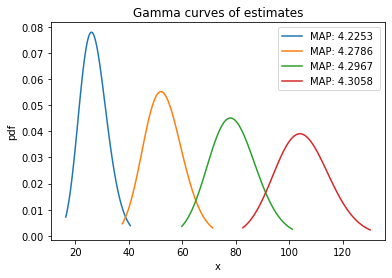

In [67]:
plot_gamma(table)